# Testing Models (Lesson 6)

Recall distinction between regression and classificaion 
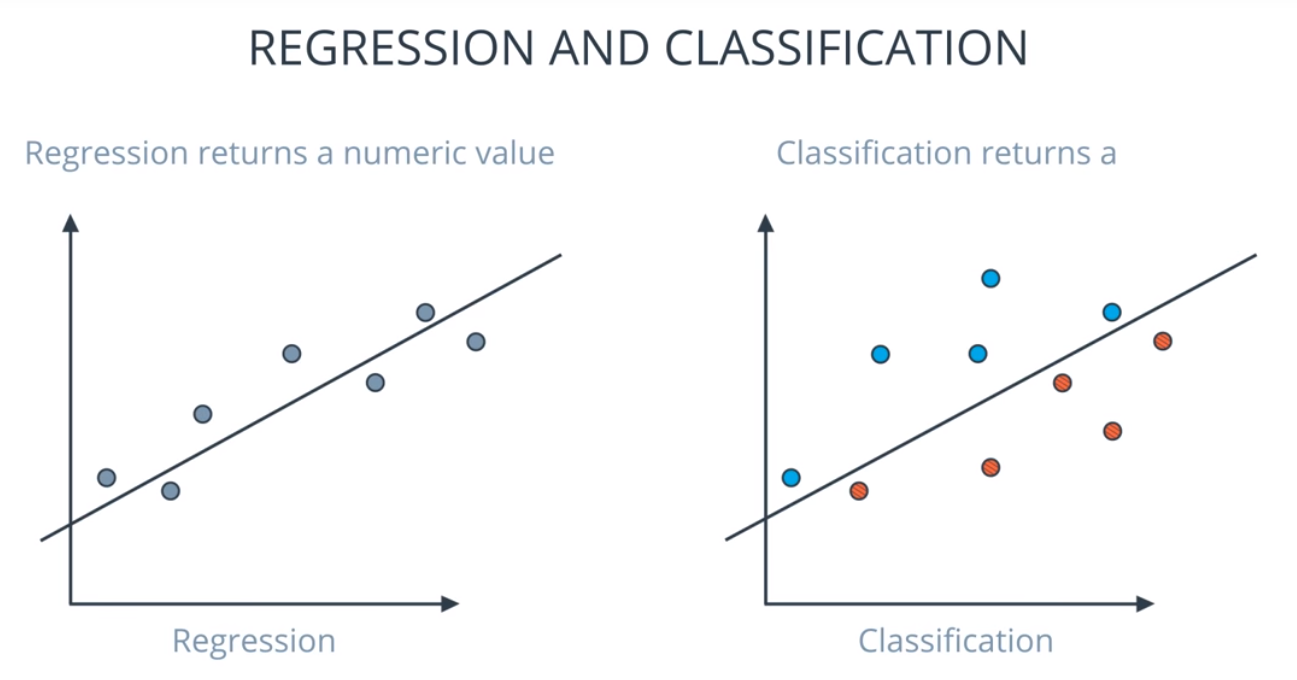

**The question is, which model fits better?**
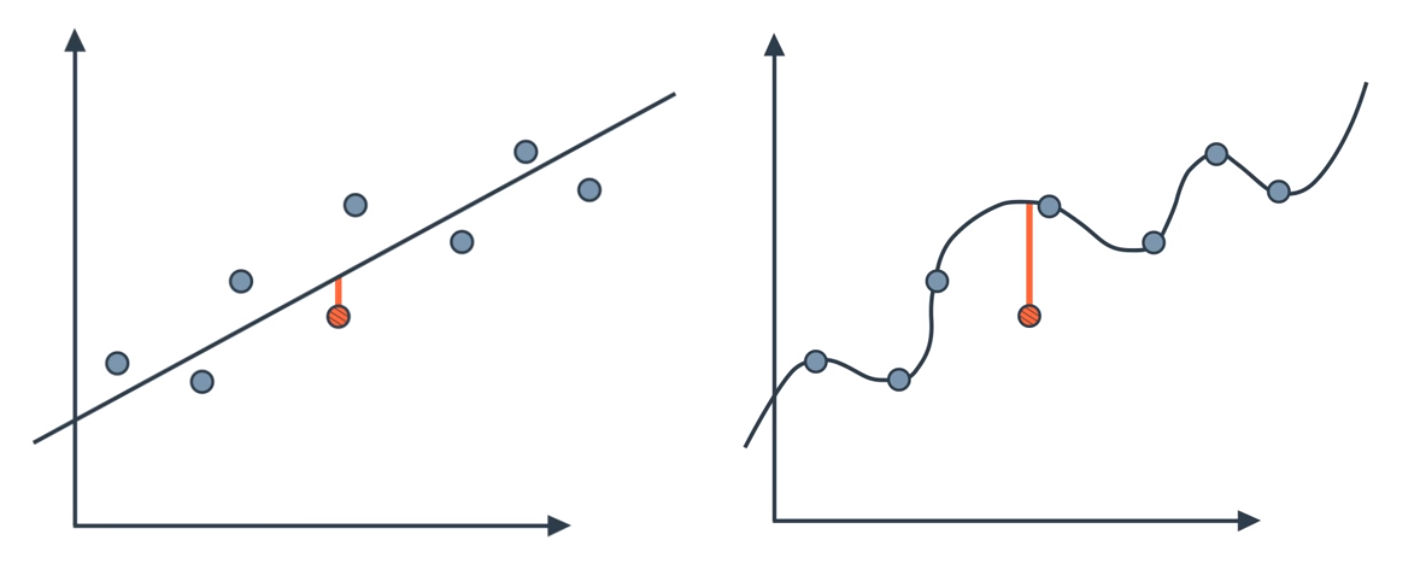
The model on left is better. It generalisies better, while the model on the right overfits the data.This is done by looking at the cumulatative error of all the data points (the red lines)

## Testing on regresion

Split the data into 2 sets, training and test. We then train on the training set and then test on the test set. We can then determine that the model on the right has a smaller error.
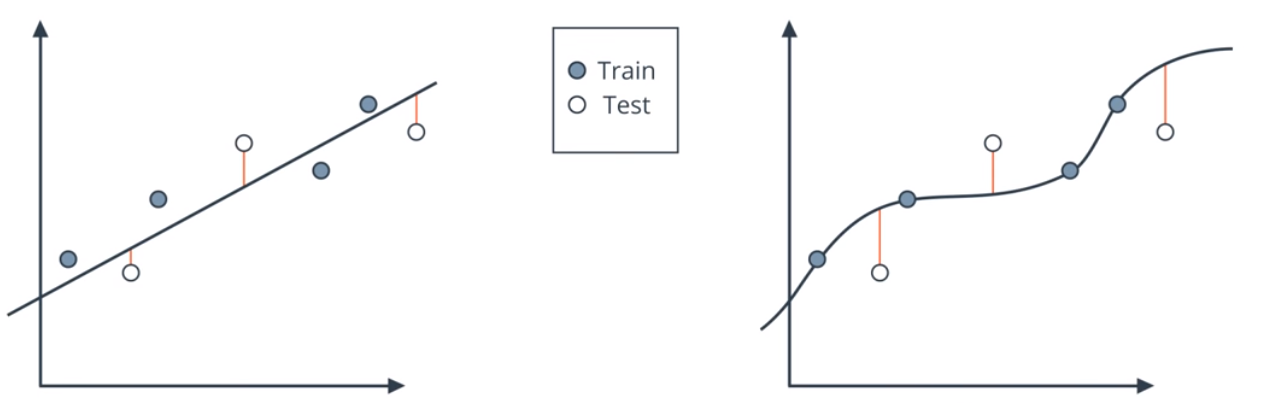

## Testing on classification models

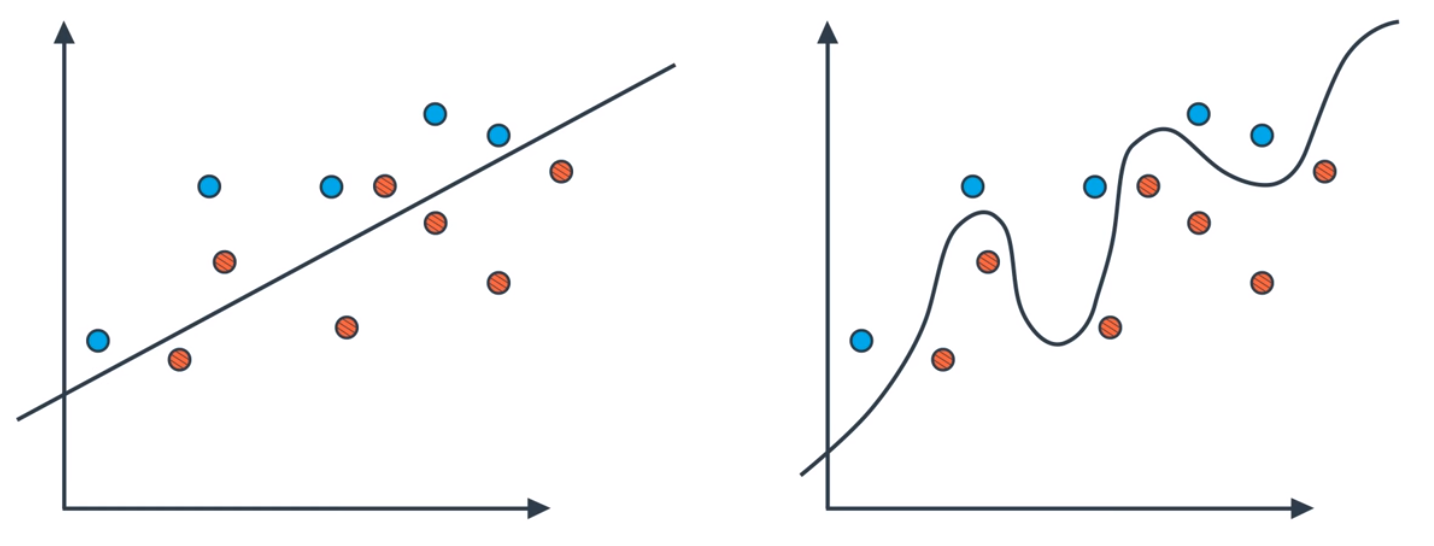
Discousion of image:
The the model on the left might fit the data in a more generalised maner as it treats the outliers as noise. 

Here we create a training and test set again. 
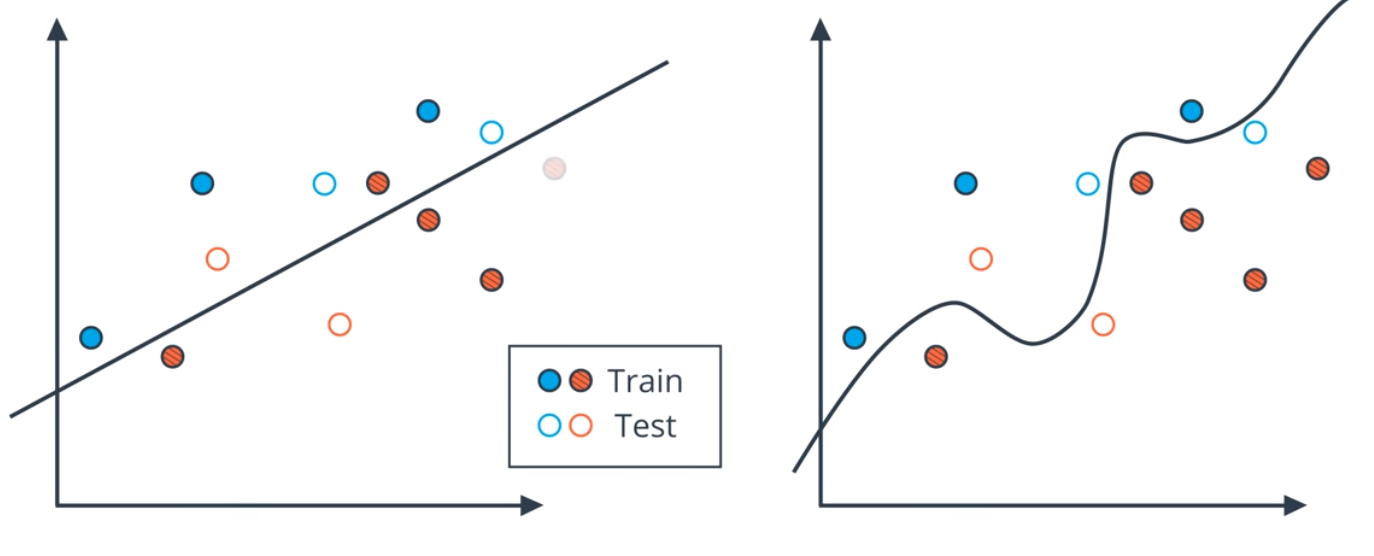
Looking at the test set results. The model on the left make less mistakes then on the right

## Example SKLearn

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

SyntaxError: invalid syntax (<ipython-input-2-77d864a23e9c>, line 1)

## Quiz

In [4]:
# Reading the csv file
import pandas as pd
data = pd.read_csv("data/testing_models.csv")

# Splitting the data into X and y
import numpy as np
X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])

# Import statement for train_test_split
from sklearn.cross_validation import train_test_split

# TODO: Use the train_test_split function to split the data into
# training and testing sets.
# The size of the testing set should be 20% of the total size of the data.
# Your output should contain 4 objects.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## Golden Rule

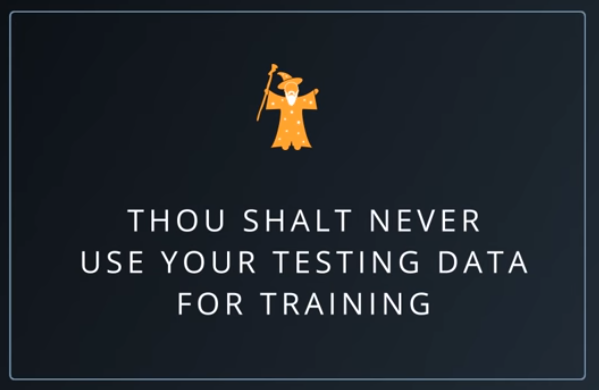

# Evaluation Metrics (Lesson 7)

## Confusion Matrix

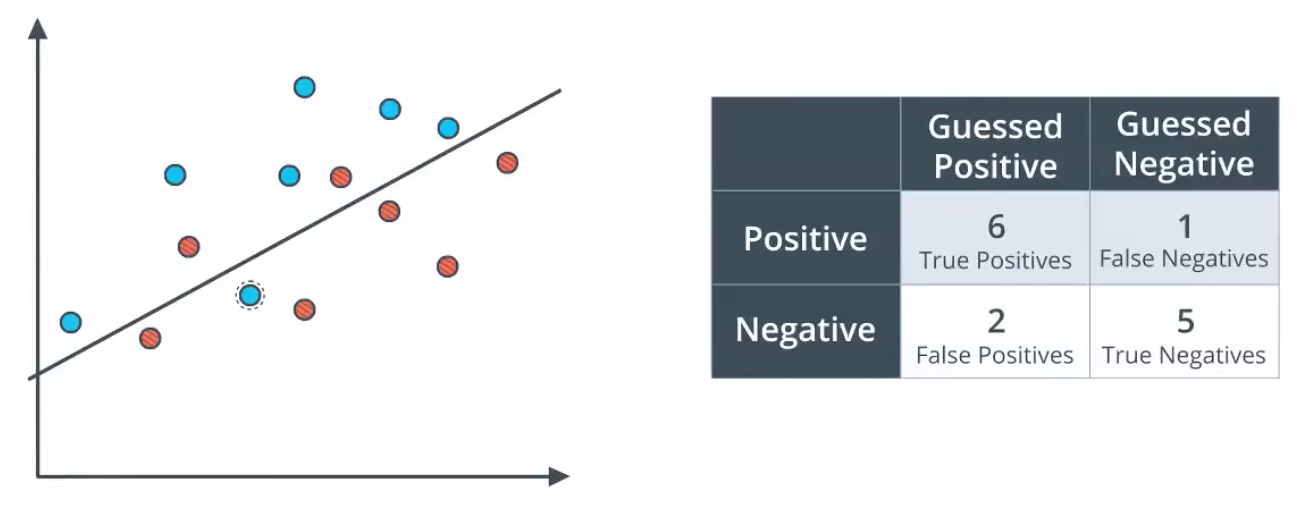

##  Accuracy 

**Out of all the outcomes, how many did we classify correcty?**

$\text{Acc} = \frac{\text{TP} + \text{TN}}{\text{TP + TN + FP + FN}}$

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

**NOTE:** Accuracy isn't always the best metric to use when dealing with skewed data.

Example: Say we have 980 non spam emails and 10 spam emails. If our classifier were to predict all the emails to be non-spam then we would have an accuracy of 98%! But we are infact missing all the spam emails being sent to us. A way to get around this is looking at precision and recall.

## Precision

** Out of all the outcomes we predicted with a positive how many did we predict correctly? ** (w.r.t our guesses, how good were our predictions?)



$$ \text{precision} = \frac{\text{TP}}{\text{TP + FP}}$$

Example:
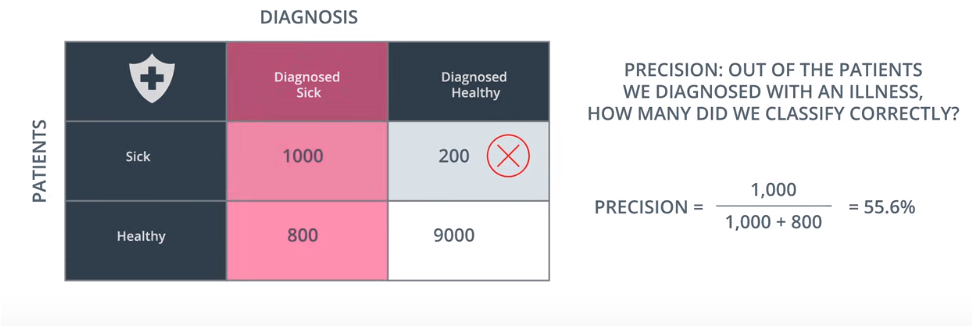

## Recall

**Out all the positive points, how many did we correctly predict as positive?** (w.r.t to the actual results, how good were our predictions?)

$$ \text{recall} = \frac{\text{TP}}{\text{TP + FN}}$$

Example:
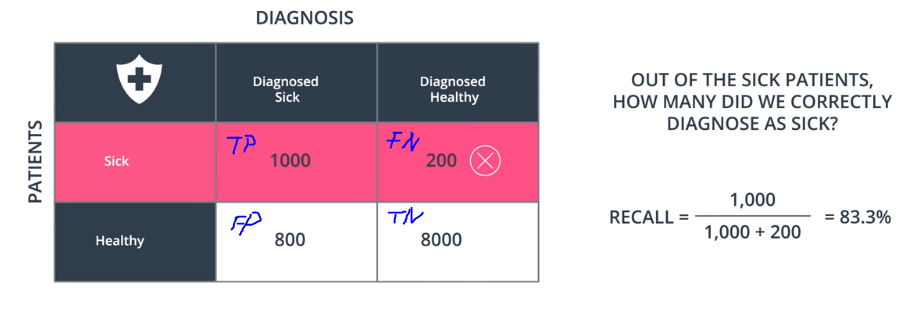

## F1 Score

How can we take the recall and precision and combine it into a single score? We can use the harmonic mean, (a good method for finding the averages of rates). The harmonic mean in the context of recall and precision is known as the **F1 Score**

$$ \text{F1} = 2 \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

Intuition:
The harmonic mean is always less then the arithmetic mean.
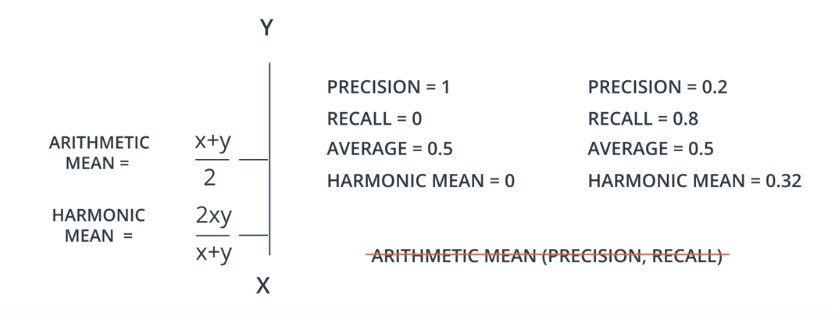

## $F_\beta$ Score

If we want either precision or recall to hold more weight in the F Score.

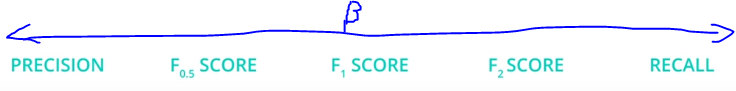

$$ F_\beta \text{ Score}= (1+\beta^2) \frac{\text{Precision} \times \text{Recall}}{\beta^2\text{Precision} + \text{Recall}}$$

The boundaries of $F_\beta$ are:
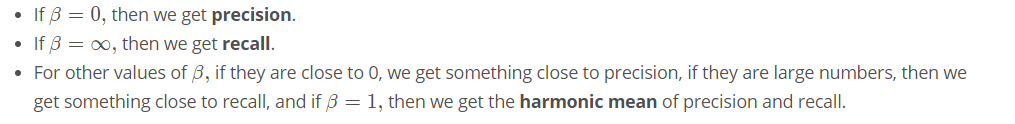

### Example

Out of the following three models, which one should have an F-beta score of 2, 1, and 0.5? Match each model with its corresponding score.

* Detecting malfunctioning parts in a spaceship
* Sending phone notifications about videos a user may like
* Sending promotional material in the mail to potential clients

* For the spaceship model, we can't really afford any malfunctioning parts, and it's ok if we overcheck some of the parts that are working well. Therefore, this is a high recall model, so we associate it with beta = 2.

* For the notifications model, since it's free to send them, we won't get harmed too much if we send them to more people than we need to. But we also shouldn't overdo it, since it will annoy the users. We also would like to find as many interested users as we can. Thus, this is a model which should have a decent precision and a decent recall. Beta = 1 should work here.

* For the Promotional Material model, we since it costs us to send the material, we really don't want to send it to many people that won't be interested. Thus, this is a high precision model. Thus, beta = 0.5 will work here.

## ROC Curve (Receiver Operating Characteristic)

Is there a way we can score how good a model model seperates our data? Yes -> ROC

We define our ROC  curve by the following equations and by moving around our split location to find new points on the curve.
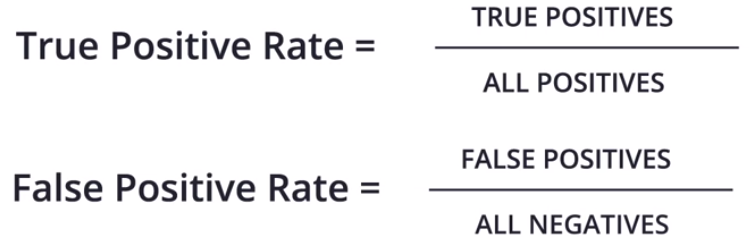

##### And use the **area under the curve as a score metric** to determine how good our model "splits the data". 

The area goes from 0 to 1 where:
* 0.5 - random split
* 0.8 - good split
* 1 - perfect split

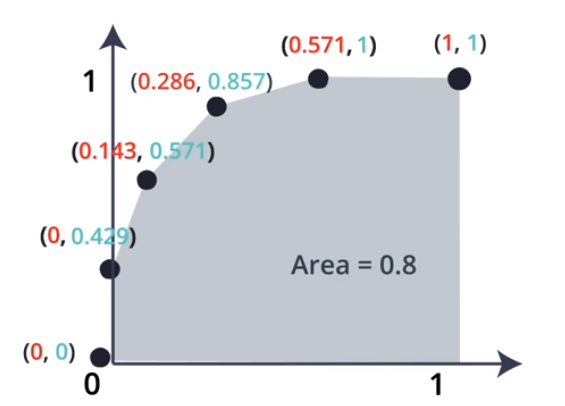

Moving our split location around:
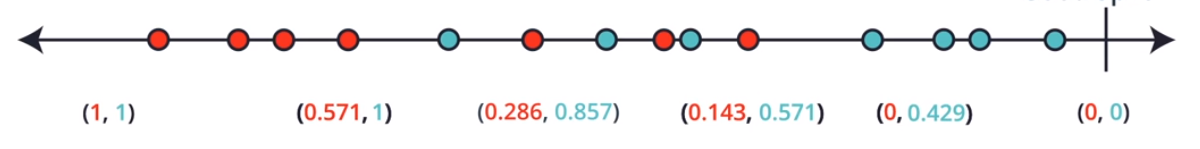

To summaries how well our splits split the data and their corresponding ROC curves:

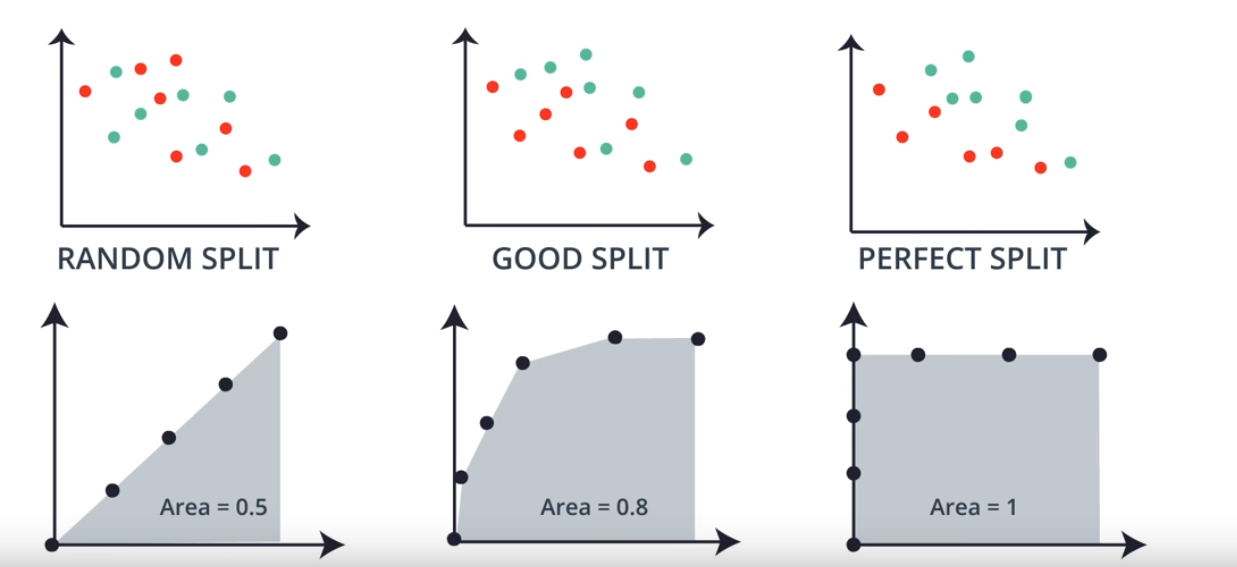

**NOTE** That we can get an area of less then 0.5 - in cases where we have more red points in the blue area and vice versa for the blue points.

## Metrics to evaluate Regresion

### Mean Abs Error

Add the abs distances (orange lines) of the points and the models function.
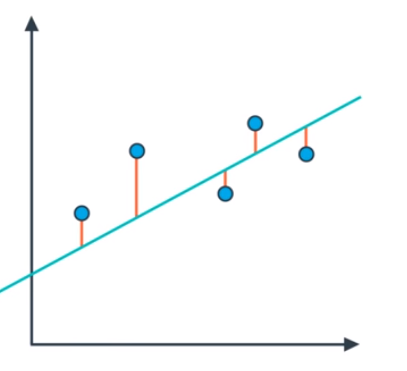

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.learn_model import LinearRegression

classifier = LinearRegression()
classifier.fit(X,y)

guesses = classifier.predict(X)

error = mean_absolute_error(y, guesses)

There is a prolbmel. The mean abs error isnt differentiable. WHich is a problem for such optimisation algorithms like gradient desecent. This is where Mean squared error comes in. 

### Mean Square Error

Add the squared distances of our points from the regression line.
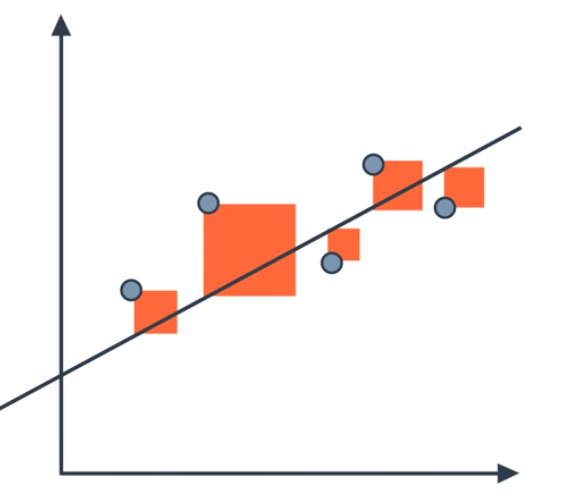

In [ ]:
from sklearn.metrics import mean_square_error
from sklearn.learn_model import LinearRegression

classifier = LinearRegression()
classifier.fit(X,y)

guesses = classifier.predict(X)

error = mean_squre_error(y, guesses)

### R2 Score

Comparing our model to the simplest model and running Mean Square Error on both models to compare.

$$R2 = 1 - \frac{\text{trained model error}}{\text{simple model error}}$$


**Example**
Taking the average of all the values to determine the simple model.

The blue diagram is the simple model and the orange model is the trained model.
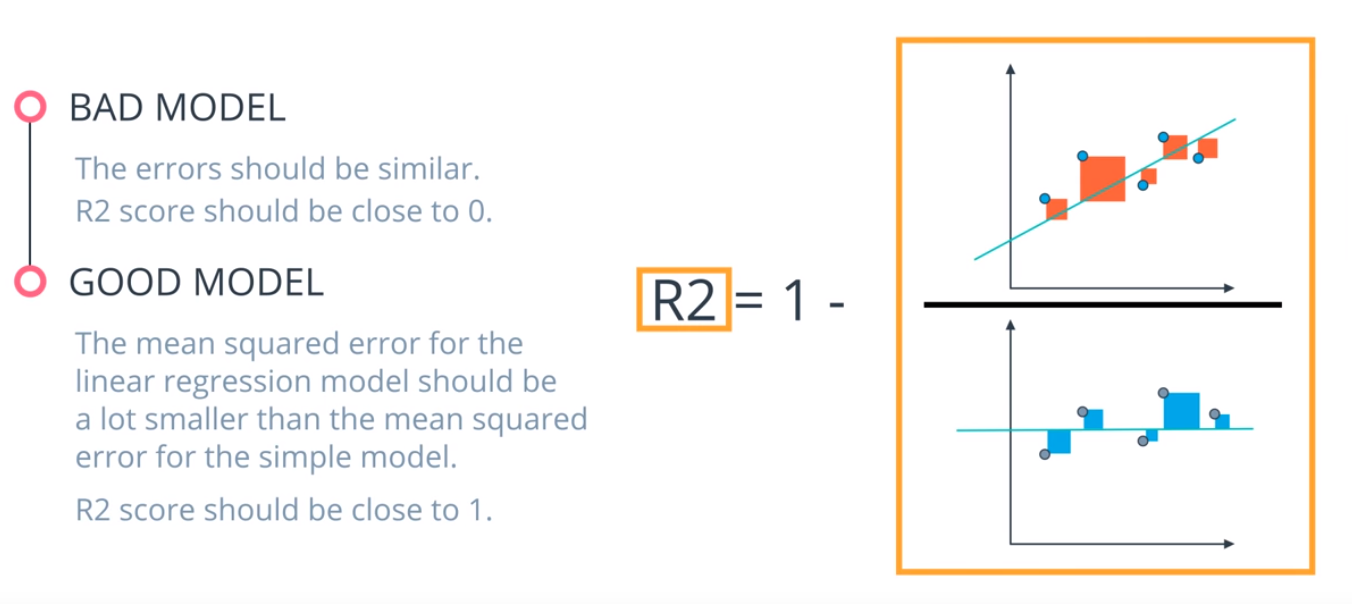

In [ ]:
from sklearn.metrics import r2_score

y_true = [1,2,4]
y_pred = [1.3,2.5,3.7]

r2_score(y_true,y_pred)

# Detecting Errors (L 8) 

## Types of Errors

### Underfitting
* Error due to bias.
* This model will not do well in the training set. 

**Regression Example:**

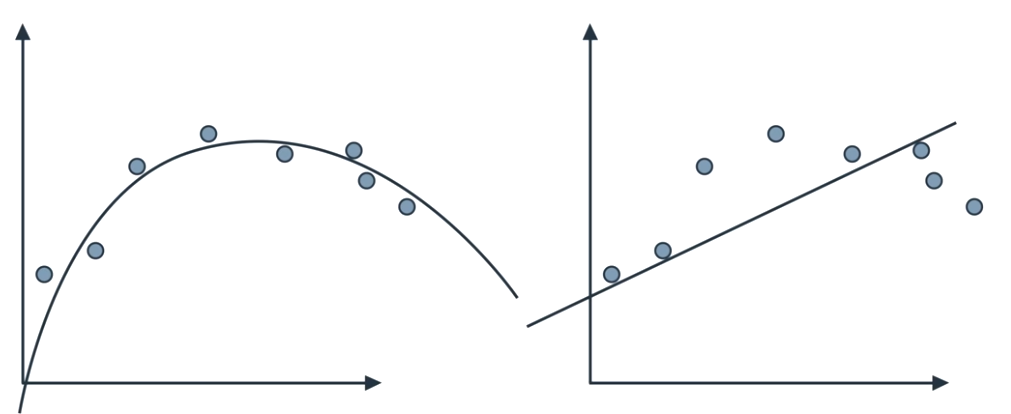

** Classification Example:**

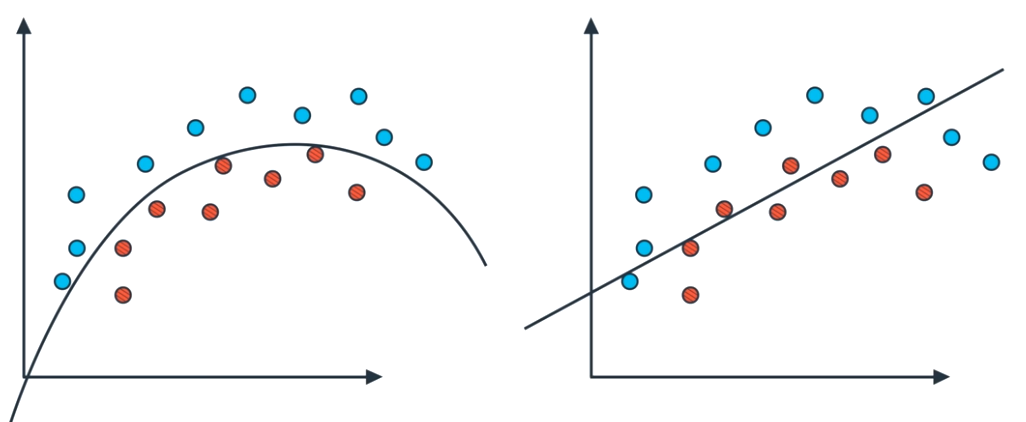

### Overfitting
* Does well in the training set but thend to memorize is instead of learning the characteristics. 

* Error due to variance
* This model does great in the training set 
* Performs poorly in the testing set

**Regression Example:**

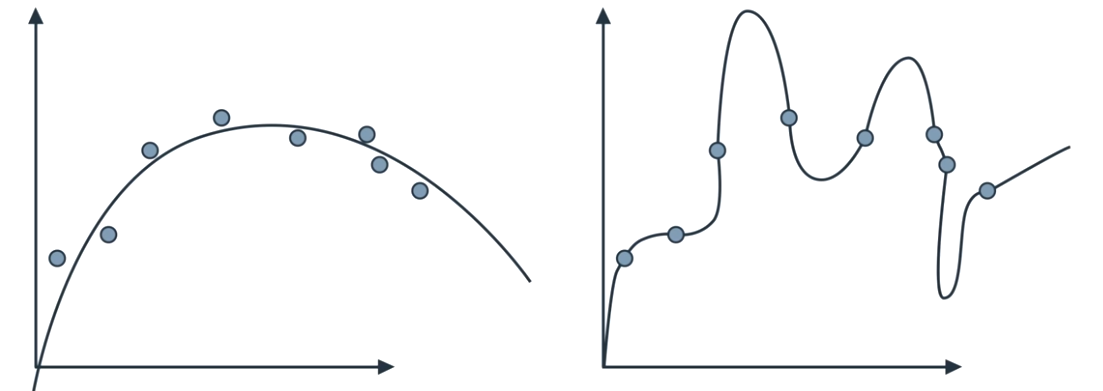

** Classification Example: **

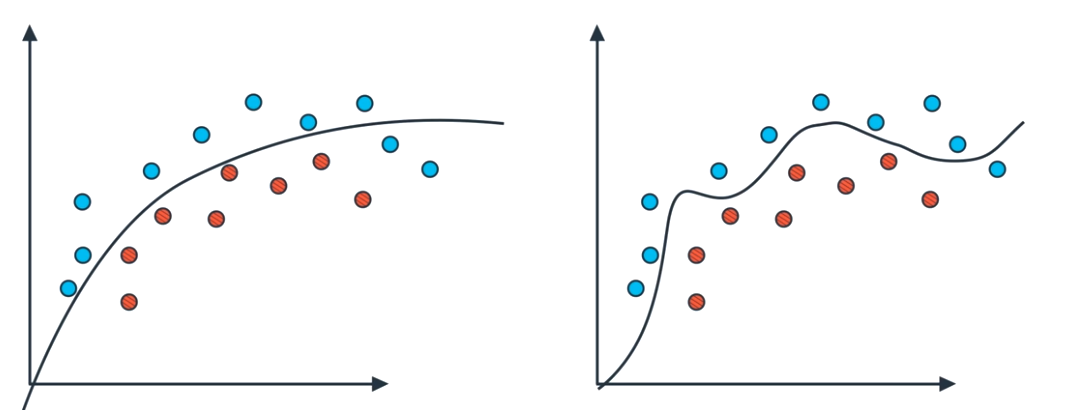

## Cross Validation 

** Model Complexity Graph**

These graphs show different logistics regresion models with varying polynomial degrees trained on a subset of data and verified on another subset of data. 

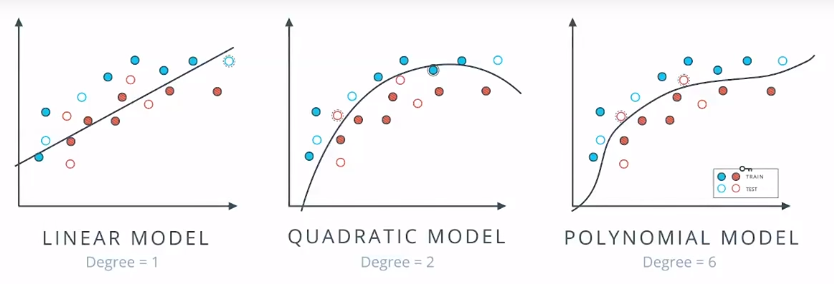

The following is called a model complexity graph which plots the models test set and training set error wrt the model.
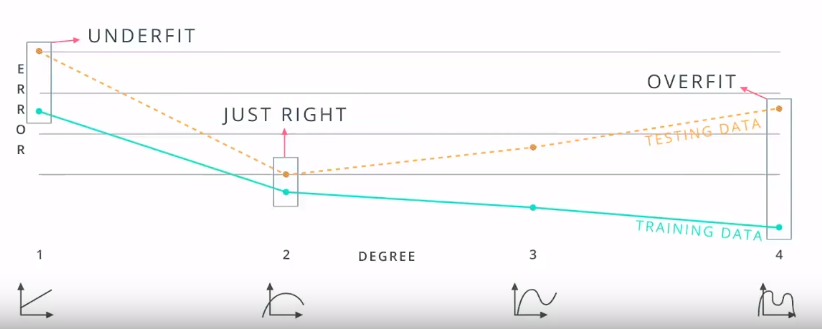

From the graph above it looks like that the model of degree 2 is the best as it has the least error difference between the test and training sets.

**BUT NOTE!**
We are using the testing set to actually determine the best polynomial degree to use (this is known as a hyper-paramater). This means that we could be overfiting to our testing set by selecting degree=2. So the need for another test set is required. (This will become clearer in Lesson 9.)

The *solution* is to split out data even more. Now we have a data set to fit our model to the data. Then another data set called the *cross validation* set to select our model paramater and then finally we will use the testing set to check everything.
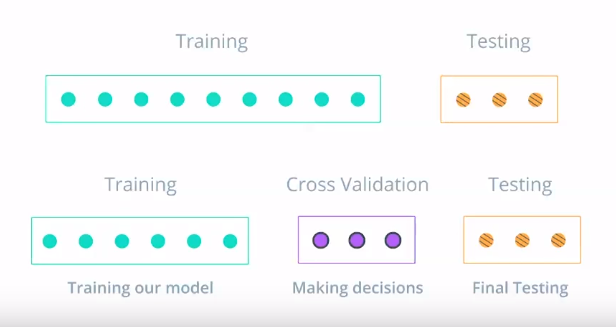

So now we will have a complexity graph like this 
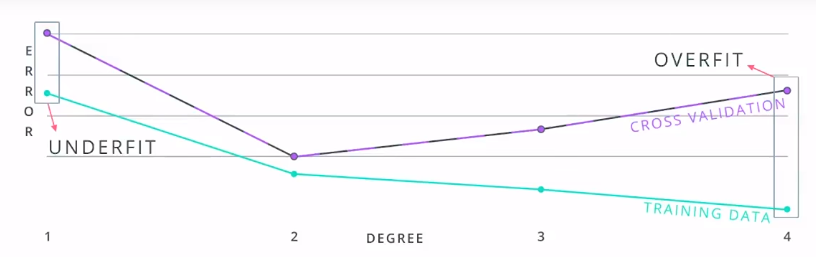

**Aside note** - general complexity graph

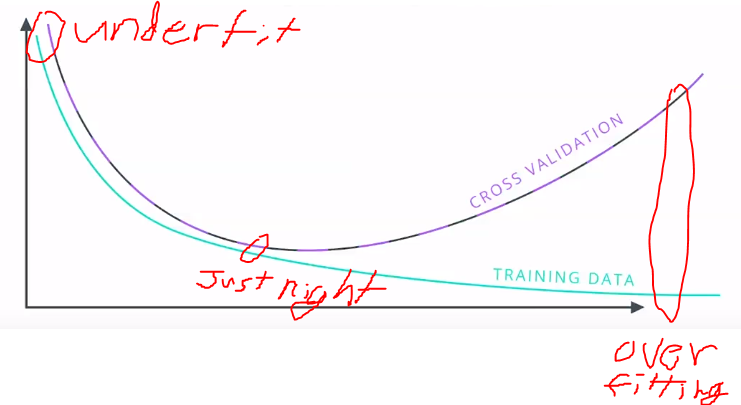

## K-Folds Cross Validation

It is limiting to split our data into subsets and then be restricted to those subsets as we wont be able to capture or test on all our datas behavior. This could be even more problamatic with sparse data.

K-folds allows us to use all our data while note breaking any rules about data independance. 

**Solution:** We break our data into k buckets. In the example bellow $k=4$.
We then train our model k-times, each times using a different bucket for our training, and test sets (what he means is the CV set). 

We then average our results to get our final result. 

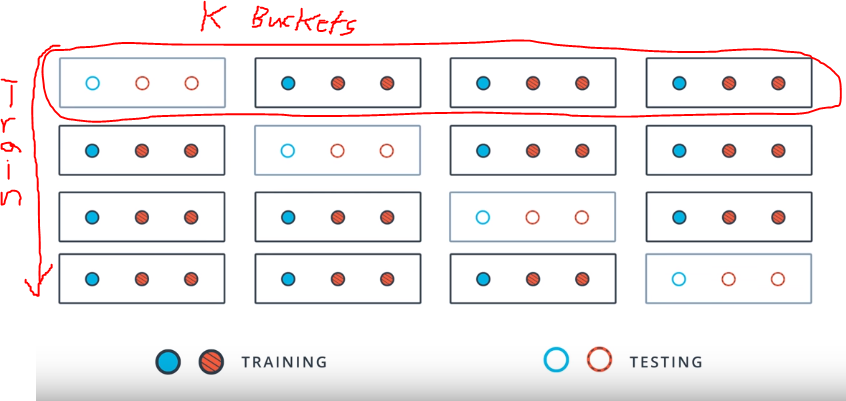

**Note** It is a good idea to shuffle our data to avoid any bias inherint in the data. K-folds normally doesn't shuffle the data before spliting the data. 

In [1]:
from sklearn.model_select import KFold
kf = KFold('n_splits','shuffle','random_state')

# randomly selecting data for our CV buckets
# 'shuffle' = True

ImportError: No module named model_select

## Learning Curves

Besides being a good tool to determine if overfitting or underfitting is occuring; It is a good diagnostic tool to determine if more data will help or if better quality data / better feature will help.

It's a plot of our training and CV errors wrt the number of training points used. Bellow is 3 examples:

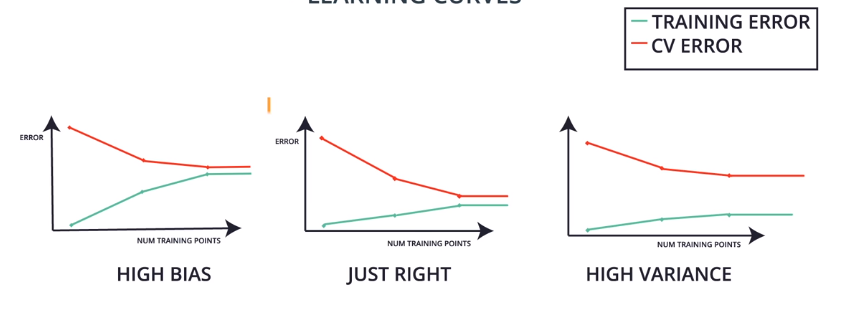

**NOTE** Here the y axis is defined wrt to the error count. In the quiz that follows the y axis is defined wrt to the models F1 score.

Long story short we can used any scoring metric that is appropirate for the used case.

## Quiz

In [11]:
### Utils.py - functions to aid in plotting
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# It is good to randomize the data before drawing Learning Curves
def randomize(X, Y):
    permutation = np.random.permutation(Y.shape[0])
    X2 = X[permutation,:]
    Y2 = Y[permutation]
    return X2, Y2



def draw_learning_curves(X, y, estimator, num_trainings):
    X2, y2 = randomize(X, y)
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, 
                                                            X2, 
                                                            y2, 
                                                            cv=None, 
                                                            n_jobs=1, 
                                                            train_sizes=np.linspace(.1, 1.0, num_trainings)
                                                           )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score")


    plt.legend(loc="best")

    plt.show()

NOTE, the y axis referes to the F1 score (i think)

Logistic Regression Underfits


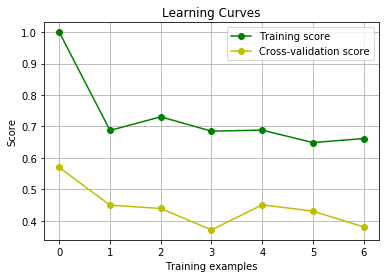

Decision Tree is just right


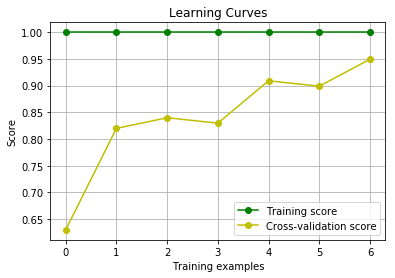

SVM overfits


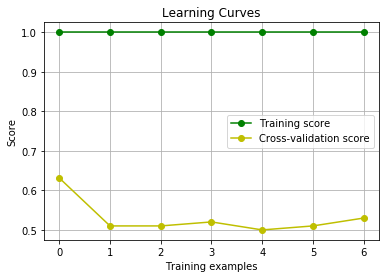

In [24]:
# Import, read, and split data
import pandas as pd
data = pd.read_csv('Data/detecting_errors_data.csv')
import numpy as np
X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])

# Fix random seed
np.random.seed(55)

### Imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# TODO: Uncomment one of the three classifiers, and hit "Test Run"
# to see the learning curve. Use these to answer the quiz below.

### Logistic Regression
estimator_1 = LogisticRegression()

### Decision Tree
estimator_2 = GradientBoostingClassifier()

### Support Vector Machine
estimator_3 = SVC(kernel='rbf', gamma=1000)

#plot the graphs 
print("NOTE, the y axis referes to the F1 score (i think)")
print("")
print("Logistic Regression Underfits")
draw_learning_curves(X,y,estimator_1,7)
print("Decision Tree is just right")
draw_learning_curves(X,y,estimator_2,7)
print("SVM overfits")
draw_learning_curves(X,y,estimator_3,7)

# Putting it all together (L 9)

## Grid Search

Grid search is an exhostive search used to find the optimal hyperparamaters for a model. This is what the cross validation set is used for.

For example we want to find the optimal C paramater for an SVM. 

We calculate the F1 score for each hyper-paramater C and then select the hyper-paramater with the best F1 score.
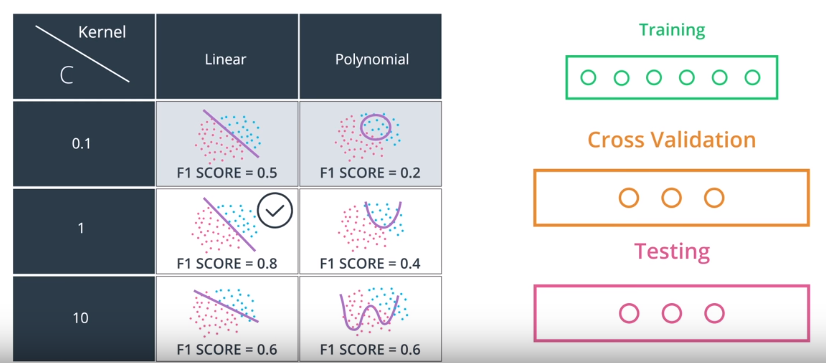
We finally used the testing set to ensure our final model works as expected.